# Black Friday Data Analysis

## Description

## Task List

1. Filling missing value
2. Univariate Data Analysis
3. Bivariate Data Analysis
4. Suprivised Learning
5. The Most Important Feature

## Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('train.csv', header=0)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df['User_ID'].describe

<bound method NDFrame.describe of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64>

In [10]:
df.drop(['User_ID','Product_ID'], inplace=True,axis=1)

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [18]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [20]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [21]:
df['Product_Category_2']=df['Product_Category_2'].fillna(9)

In [23]:
df['Product_Category_2'].describe()

count    550068.000000
mean          9.576434
std           4.226025
min           2.000000
25%           8.000000
50%           9.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [24]:
df['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [25]:
df['Product_Category_3']=df['Product_Category_3'].fillna(14)

In [26]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Univariate Data Analysis

In [27]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

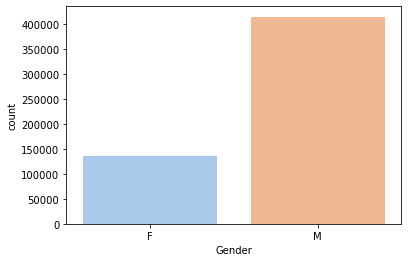

In [29]:
sns.countplot(df['Gender'], palette='pastel')

As you can see from the graph above, most costumer is dominated by males.

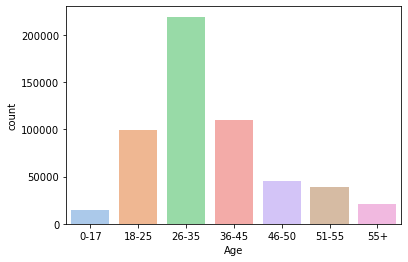

In [31]:
sns.countplot(df['Age'],palette='pastel', order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

As you can see from the graph above, most costumer age group is between 26-35, followed by 36-45 and then 18-25.

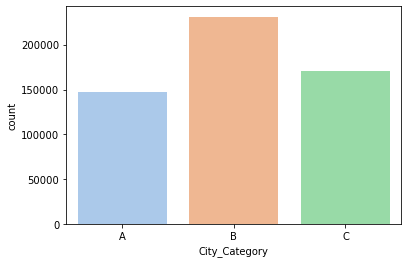

In [34]:
sns.countplot(df['City_Category'], palette='pastel',order=['A','B','C'])

As you can see from the graph above, most costumers live in city category of B, followed by C and A.

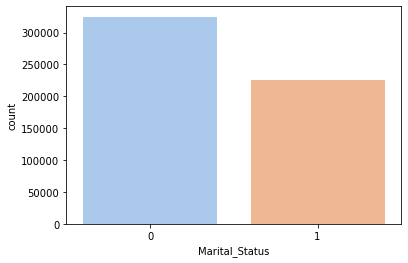

In [35]:
sns.countplot(df['Marital_Status'], palette='pastel')

As you can see from the graph above, most customers haven't married yet.

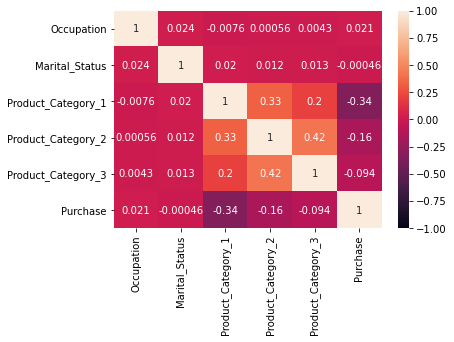

In [36]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

As you can see from the graph above, there is no notable correlation between variable yet.

## Bivariate Data Analysis

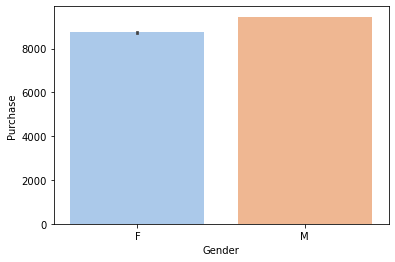

In [37]:
sns.barplot(x='Gender',y='Purchase',data=df,palette='pastel')

As you can see from the graph above, although the most common customer is a male, there's no notable difference in purchasing quantity.

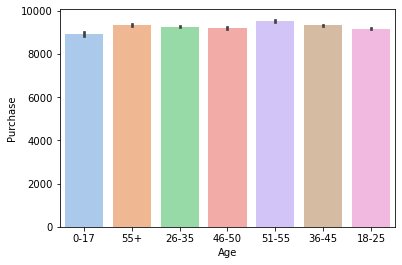

In [38]:
sns.barplot(x='Age',y='Purchase',data=df,palette='pastel')

As you can see from the graph above, there's no notable difference between age group in purchasing quantity.

## Training and Testing Model 

### Convert categorical into numerical with dummy pandas

In [39]:
dummy = pd.get_dummies(df,drop_first=True)

In [40]:
dummy.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [41]:
y = dummy['Purchase'].values
X = dummy.drop('Purchase',axis=1).values

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [46]:
fit1 = lr.fit(X_train,y_train)
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

In [47]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 12.516441312708382
Accuracy Score of Decision Tree on test set 55.324582682109536
Accuracy Score of Random Forests on test set 62.82884859510178
Accuracy Score of Gradient Boosting on testset 64.35063428964041


In [48]:
coef=pd.Series(rfr.feature_importances_, dummy.drop('Purchase',axis=1).columns).sort_values(ascending=False)

In [49]:
coef

Product_Category_1               0.766250
Occupation                       0.063603
Product_Category_2               0.025255
Product_Category_3               0.017984
Marital_Status                   0.016534
Gender_M                         0.012639
Stay_In_Current_City_Years_1     0.012592
Stay_In_Current_City_Years_3     0.010592
Stay_In_Current_City_Years_2     0.010541
Age_26-35                        0.009760
Stay_In_Current_City_Years_4+    0.009704
City_Category_B                  0.009311
Age_36-45                        0.008478
Age_18-25                        0.007918
Age_46-50                        0.005299
City_Category_C                  0.005182
Age_51-55                        0.004710
Age_55+                          0.003648
dtype: float64

## The Most Important Feature

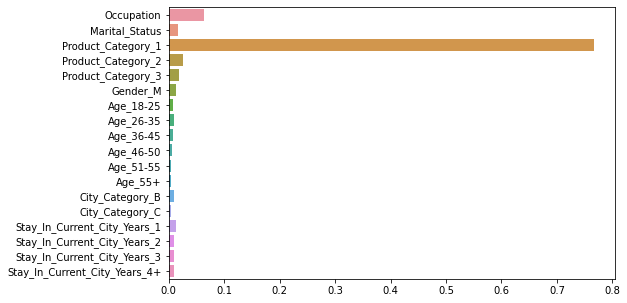

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(rfr.feature_importances_, dummy.drop('Purchase',axis=1).columns)

As you can see from the graph above the most important feature for product quantity to be purchased is Product category, followed by occupation.